In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

## Data Input from Google Drive to Google Colab

In [ ]:
sheet_url_1 = 'https://drive.google.com/file/d/1R9g5f310AA1Zmrnmd8P8jclnyToN54Bx/view'
sheet_url_1 ='https://drive.google.com/uc?id=' + sheet_url_1.split('/')[-2]
Orders_dataset = pd.read_csv(sheet_url_1)
Orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
sheet_url_2 = 'https://drive.google.com/file/d/1S_BzA_P4v26oIvErtB4Ta64fQB53Hw1_/view?usp=sharing'
sheet_url_2 ='https://drive.google.com/uc?id=' + sheet_url_2.split('/')[-2]
Customers_dataset = pd.read_csv(sheet_url_2)
Customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
sheet_url_3 = 'https://drive.google.com/file/d/1JBzMoiRBy6YsxHoS3OhysRcZZyRh5DQD/view?usp=sharing'
sheet_url_3 ='https://drive.google.com/uc?id=' + sheet_url_3.split('/')[-2]
Order_payments_dataset = pd.read_csv(sheet_url_3)
Order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## Combining Data

In [ ]:
df_combined1 = pd.merge(Orders_dataset, Customers_dataset, how='outer', left_on = 'customer_id', right_on = 'customer_id')
df_combined2 = pd.merge(df_combined1, Order_payments_dataset, how='outer', left_on = 'order_id', right_on = 'order_id')
df_combined2.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,credit_card,1.0,72.20
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,credit_card,1.0,28.62
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,1.0,credit_card,6.0,175.26
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,1.0,credit_card,1.0,65.95
9,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,1.0,credit_card,3.0,75.16


## Data Cleaning (NaN Value)

In [ ]:
df = df_combined2
df_null = df[df.isna().any(axis=1)]

print(df_null.count())
print("")
print("_____________________________________________________")
print("Number of incomplete data :", len(df_null))
print("Percentage of incomplete data:",len(df_null)*100/len(Orders_dataset),"%")
print("_____________________________________________________")

order_id                         3148
customer_id                      3148
order_status                     3148
order_purchase_timestamp         3148
order_approved_at                2973
order_delivered_carrier_date     1260
order_delivered_customer_date      16
order_estimated_delivery_date    3148
customer_unique_id               3148
customer_zip_code_prefix         3148
customer_city                    3148
customer_state                   3148
payment_sequential               3147
payment_type                     3147
payment_installments             3147
payment_value                    3147
dtype: int64

_____________________________________________________
Number of incomplete data : 3148
Percentage of incomplete data: 3.1656962419927392 %
_____________________________________________________


In [ ]:
# Remove all null
df = df.dropna()
df_null2 = df[df.isna().any(axis=1)]

print(df_null2.count())
print("")
print("_____________________________________________________")
print("Number of incomplete data :", len(df_null2))
print("Percentage of incomplete data:",len(df_null2)*100/len(Orders_dataset),"%")
print("_____________________________________________________")

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

_____________________________________________________
Number of incomplete data : 0
Percentage of incomplete data: 0.0 %
_____________________________________________________


In [ ]:
df_ori = df.drop_duplicates()
df_ori = df_ori.reset_index(drop=True)
df_ori.tail(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
100729,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07 00:00:00,c716cf2b5b86fb24257cffe9e7969df8,78048,cuiaba,MT,1.0,credit_card,2.0,42.42
100730,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07 00:00:00,c716cf2b5b86fb24257cffe9e7969df8,78048,cuiaba,MT,2.0,voucher,1.0,64.37
100731,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17 00:00:00,e03dbdf5e56c96b106d8115ac336f47f,35502,divinopolis,MG,2.0,voucher,1.0,250.00
100732,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17 00:00:00,e03dbdf5e56c96b106d8115ac336f47f,35502,divinopolis,MG,1.0,credit_card,5.0,139.43
100733,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22 00:00:00,831ce3f1bacbd424fc4e38fbd4d66d29,5127,sao paulo,SP,1.0,credit_card,3.0,155.99
100734,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1.0,credit_card,3.0,85.08
100735,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,credit_card,3.0,195.00
100736,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,credit_card,5.0,271.01
100737,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,credit_card,4.0,441.16
100738,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR,1.0,debit_card,1.0,86.86


In [ ]:
#Timedate type
df_ori['order_purchase_timestamp'] = pd.to_datetime(df_ori['order_purchase_timestamp'])
df_ori['order_approved_at'] = pd.to_datetime(df_ori['order_approved_at'])
df_ori['order_delivered_carrier_date'] = pd.to_datetime(df_ori['order_delivered_carrier_date'])
df_ori['order_delivered_customer_date'] = pd.to_datetime(df_ori['order_delivered_customer_date'])
df_ori['order_estimated_delivery_date'] = pd.to_datetime(df_ori['order_estimated_delivery_date'])

## Removing Outliers --Payment Value

Quantile 3 : 171.29
Quantile 1 : 56.78
Batas atas 285.79999999999995
Batas bawah -57.72999999999999


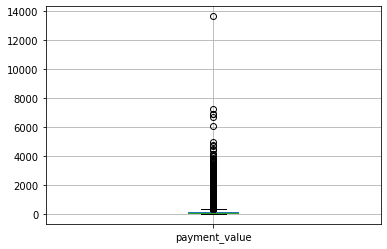

In [ ]:
df_ori = df_ori.loc[df_ori['order_status'] != 'cancelled']
df_ori.boxplot(column = 'payment_value')
Q3 = df_ori.payment_value.quantile(0.75)
Q1 = df_ori.payment_value.quantile(0.25)
IQR = Q3-Q1

Max_value = Q3 + IQR
Min_value = Q1 - IQR
print("Quantile 3 :",Q3)
print("Quantile 1 :",Q1)
print("Batas atas", Max_value)
print("Batas bawah", Min_value)

Number of outlier is  10558
Outlier Percentage is 10.480548744776105 %


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f07f5e05390>],
      dtype=object)

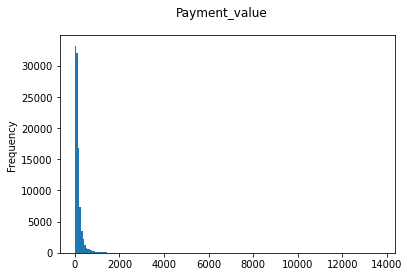

In [ ]:
a = 0
for i in range (0,len(df)):
  if df_ori.payment_value[i] > Max_value or df_ori.payment_value[i] < Min_value :
    a = a+1

print("Number of outlier is ",a)
print("Outlier Percentage is",a*100/len(df),"%")

df_ori.payment_value.plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Payment_value',bins = 200)

Number of outlier is  0
Outlier Percentage is 0.0 %


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12


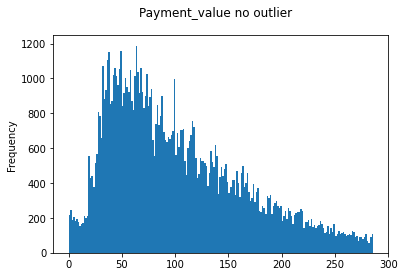

In [ ]:
df_clean = df_ori.loc[(df_ori['payment_value']<Max_value) &
                  (df_ori['payment_value']>Min_value)]

df_ori = df_clean.reset_index(drop=True)
df_clean = df_clean.reset_index(drop=True)

a = 0
for i in range (0,len(df_clean)):
  if df_clean.payment_value[i] > Max_value or df_clean.payment_value[i] < Min_value :
    a = a+1

print("Number of outlier is ",a)
print("Outlier Percentage is",a*100/len(df_clean),"%")

df_clean.payment_value.plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Payment_value no outlier',bins = 200)
df_clean.head(5)

## Exploratory Data Analysis --Descriptive Analysis

In [ ]:
print("Count every distinct value in each column")
print("______________________________________")
print(df_ori.nunique())
print("______________________________________")

print("Count every min in each column")
print(df_ori.min())
print("______________________________________")

print("Count every max in each column")
print(df_ori.max())
print("______________________________________")

print("Count every median in each column")
print(df_ori.median())
print("______________________________________")

print("Count every mode in each column")
print(df_ori.mode().T)
print("______________________________________")

print("Count every mean in each column")
print(df_ori.iloc[12:14].mean())
print("______________________________________")

print("Count every Q1 in each column")
print(df_ori.quantile(q=0.25))
print("______________________________________")

print("Count every Q3 in each column")
print(df_ori.quantile(q=0.75))
print("______________________________________")

print("Count every range in each column")
print(df_ori.quantile(q=0.75)-df_ori.quantile(q=0.25))
print("______________________________________")

print("Count every variance in each column")
print(df_ori.var())
print("______________________________________")

print("Count every standard deviation in each column")
print(df_ori.std())
print("______________________________________")

print("Count every coef of var in each column")
print(df_ori.iloc[12:14].std()/df_ori.iloc[12:14].mean())
print("______________________________________")

print("Count every kurtosis in each column")
print(df_ori.kurtosis())
print("______________________________________")

print("Count every skewness in each column")
print(df_ori.skew())
print("______________________________________")

print("average of payment_sequential:", df_ori.payment_sequential.mean())
print("average of payment_installments:", df_ori.payment_installments.mean())
print("average of payment_value:", df_ori.payment_value.mean())


Count every distinct value in each column
______________________________________
order_id                         86092
customer_id                      86092
order_status                         2
order_purchase_timestamp         85646
order_approved_at                79370
order_delivered_carrier_date     72061
order_delivered_customer_date    85433
order_estimated_delivery_date      440
customer_unique_id               83438
customer_zip_code_prefix         14480
customer_city                     3918
customer_state                      27
payment_sequential                  26
payment_type                         4
payment_installments                24
payment_value                    20664
dtype: int64
______________________________________
Count every min in each column
order_id                         00010242fe8c5a6d1ba2dd792cb16214
customer_id                      00012a2ce6f8dcda20d059ce98491703
order_status                                             canceled
order_purchase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  from ipykernel import kernelapp as app


                                                              0      1
order_id                       ccf804e764ed5650cd8759557269dc13    NaN
customer_id                    92cd3ec6e2d643d4ebd0e3d6238f69e2    NaN
order_status                                          delivered    NaN
order_purchase_timestamp                    2017-06-07 12:05:10    NaT
order_approved_at                           2017-06-09 16:15:08    NaT
order_delivered_carrier_date                2018-05-09 15:48:00    NaT
order_delivered_customer_date               2017-06-22 16:04:46    NaT
order_estimated_delivery_date               2017-12-20 00:00:00    NaT
customer_unique_id             9a736b248f67d166d2fbb006bcb877c3    NaN
customer_zip_code_prefix                                  22790  24220
customer_city                                         sao paulo    NaN
customer_state                                               SP    NaN
payment_sequential                                          1.0    NaN
paymen

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select onl

customer_zip_code_prefix     0.814121
payment_sequential          14.376036
payment_installments         1.837119
payment_value                0.761123
dtype: float64
______________________________________
average of payment_sequential: 1.0972821325999933
average of payment_installments: 2.5689668555460683
average of payment_value: 103.40060378571376


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


## Exploratory Data Analysis --Visualization

### Number of Orders/Month

In [ ]:
# Number of orders/mont
df_ori.sort_values(by=['order_approved_at'],ascending=False).head(5)
df_month = df_ori['order_approved_at'].dt.strftime('%Y/%m')
df_month = pd.DataFrame(df_month)
df_month['order_id']=df_ori['order_id']


df_month = df_month[['order_approved_at','order_id']].groupby('order_approved_at', as_index=False).count()
df_month = df_month.rename(columns={'order_id':'total order'})
df_month = df_month.sort_values(by=['order_approved_at'],ascending=True)
df_month = df_month.set_index('order_approved_at')

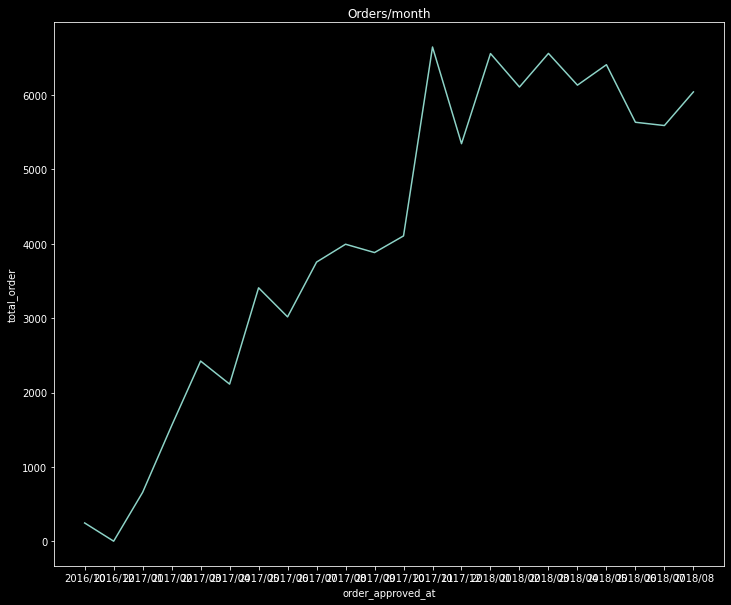

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
 
plt.style.use("dark_background")
plt.figure(figsize=(12, 10))
 
plt.xlabel("order_approved_at")
plt.ylabel("total_order")
plt.title("Orders/month")

plt.rcParams.update({'font.size': 8})
plt.plot(df_month["total order"])

# 2018 was the busiest year, especially january, march, and may. 
# In 2017 there are massive spike showing a great improvement.
# 2018 until latest time shows a decreasing trend.

### Busiest Day

In [ ]:
#Busiest Day
df_day = df_ori['order_approved_at'].dt.dayofweek
df_day = pd.DataFrame(df_day)
df_day['order_id']=df_ori['order_id']

df_day = df_day[['order_approved_at','order_id']].groupby('order_approved_at', as_index=False).count()
df_day = df_day.rename(columns={'order_id':'total order'})
df_day = df_day.sort_values(by=['order_approved_at'],ascending=True)

encode_values = { 
    "Days" : {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6:"Saturday"},
    }
df_day.order_approved_at = df_day.order_approved_at.replace(encode_values['Days'])
df_day = df_day.set_index('order_approved_at')

df_day.sort_values(by=['total order'],ascending=False)

,total order
order_approved_at,
Monday,17442
Tuesday,14341
Wednesday,14009
Thursday,13253
Sunday,11883
Friday,11009
Saturday,8244


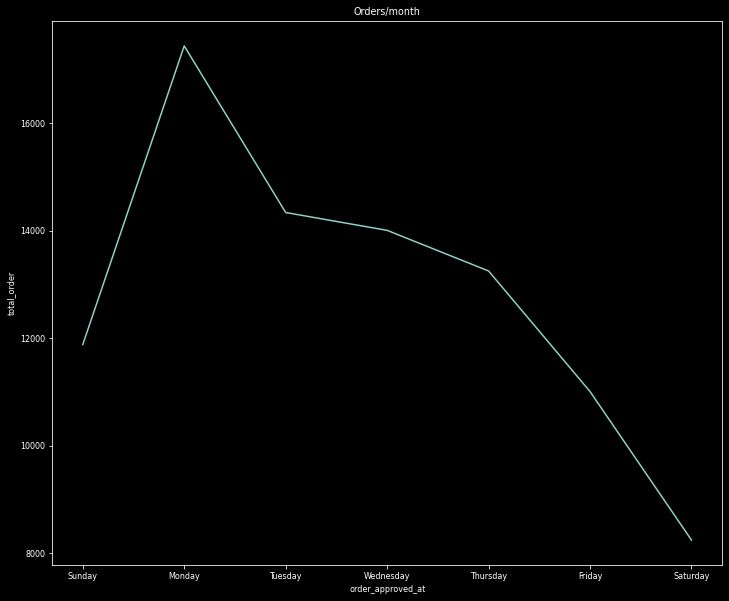

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

plt.style.use("dark_background")
plt.figure(figsize=(12, 10))
 
plt.xlabel("order_approved_at")
plt.ylabel("total_order")
plt.title("Orders/month")

plt.rcParams.update({'font.size': 8})
plt.plot(df_day["total order"])

#Busiest Day is Monday, then Tuesday, then wednesday

## Payment Type Percentage

In [ ]:
df_payment_type = df_ori['payment_type']
df_payment_type = pd.DataFrame(df_payment_type)
df_payment_type['order_id']=df_ori['order_id']

df_payment_type = df_payment_type[['payment_type','order_id']].groupby('payment_type', as_index=False).count()
df_payment_type = df_payment_type.rename(columns={'order_id':'total_order'})

List_percentage = []
B = df_payment_type.total_order.sum()
for i in range(0,len(df_payment_type)):
  List_percentage.append(df_payment_type.total_order[i]*100/B)
  
df_payment_type['payment type percentage (%)'] = List_percentage
df_payment_type = df_payment_type.sort_values('payment type percentage (%)')
df_payment_type
## Most of the users prefer the use of credit card and boleto

,payment_type,total_order,payment type percentage (%)
2,debit_card,1370,1.519167
3,voucher,5384,5.970215
0,boleto,17467,19.368825
1,credit_card,65960,73.141793


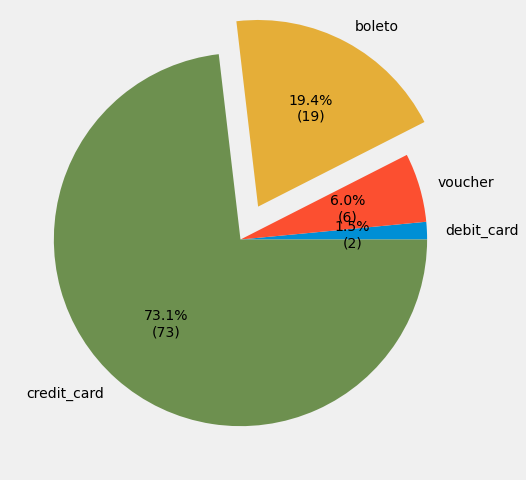

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("fivethirtyeight")

y = np.array(df_payment_type['payment type percentage (%)'])
mylabels = df_payment_type.payment_type
myexplode = [0.0, 0.0, 0.2, 0.]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8, 8))
plt.pie(y, labels = mylabels, explode = myexplode, autopct=lambda pct: func(pct, y),textprops=dict(color="k"))
plt.show() 

## Business Question

In [ ]:
# 1.  Is there any difference between cities in term of their average payment value and how many users in there ? Creating a ranking system is better 
# --- This insight could be use for predicting their buying power and create city priority campaign.

# 2. Can we estimate the online shop revenue per month ?
# --- This could be used to forecast our revenue and analyze whether a campaign is successful or not.

# 3. Can we estimate delivery time based on the customer location ?
# --- This could be used to create a better user experience.



## Q1 : City Campaign --Data Processing

In [ ]:
Answer_one_p1 = df_clean[['customer_city','payment_value']].groupby('customer_city', as_index=False).mean()
Answer_one_p1
Answer_one_p2 = df_clean[['customer_city','order_id']].groupby('customer_city', as_index=False).count()
Answer_one_p2
Answer_one_final = pd.merge(Answer_one_p1, Answer_one_p2, how='outer', left_on = 'customer_city', right_on = 'customer_city')
Answer_one_final = Answer_one_final.set_axis(['customer_city','payment_value','total_order'], axis=1)

Answer_one_final = pd.merge(Answer_one_p1, Answer_one_p2, how='outer', left_on = 'customer_city', right_on = 'customer_city')
Answer_one_final = Answer_one_final.set_axis(['customer_city','payment_value','total_order'], axis=1)

List_percentage = []
B = Answer_one_final.total_order.sum()
for i in range(0,len(Answer_one_final)):
  List_percentage.append(Answer_one_final.total_order[i]*100/B)

Answer_one_final['Percentage from all of the orders (%)'] = List_percentage
Answer_one_final.sort_values(by=['total_order'],ascending=False).head(5)

,customer_city,payment_value,total_order,Percentage from all of the orders (%)
3414,sao paulo,94.224165,14345,15.906898
2989,rio de janeiro,106.265476,6151,6.820727
428,belo horizonte,104.978373,2532,2.807687
526,brasilia,108.527058,1910,2.117963
1085,curitiba,101.512476,1373,1.522494


## Q1 : City Campaign --Ranking/Priority System

In [ ]:
## Ranking system can be used to create priority between cities. This is useful when the e-commerce want to create an advertisement through a billboard, or sponsor a local competition 
## the e-commerce platform could create an advertisement based on how much do the user spends in ther market, therefore creating more transactions.

#Normalization
Ranks = Answer_one_final
Ranks = Ranks.rename(columns={"payment_value":"avg_payment_value"})
Ranks['payment_normalized'] = (Ranks['avg_payment_value']- min(Ranks['avg_payment_value']))/(max(Ranks['avg_payment_value'])- min(Ranks['avg_payment_value']))
Ranks['total_order_normalized'] = (Ranks['total_order']- min(Ranks['total_order']))/(max(Ranks['total_order'])- min(Ranks['total_order']))
Ranks.sort_values(by=['total_order'],ascending=False).head(5)

#Proportion of scoring weight
a = 0.1 #Payment average
b = 0.9 #Total orders from one region
Ranks['score'] = Ranks['payment_normalized']*a + Ranks['total_order_normalized']*b
Ranks['rank'] = Ranks['score'].rank(ascending=False)

Ranks.sort_values(by=['score'],ascending=False).head(5)

,customer_city,avg_payment_value,total_order,Percentage from all of the orders (%),payment_normalized,total_order_normalized,score,rank
3414,sao paulo,94.224165,14345,15.906898,0.289677,1.000000,0.928968,1.0
2989,rio de janeiro,106.265476,6151,6.820727,0.334338,0.428751,0.419309,2.0
428,belo horizonte,104.978373,2532,2.807687,0.329564,0.176450,0.191761,3.0
526,brasilia,108.527058,1910,2.117963,0.342726,0.133087,0.154051,4.0
1085,curitiba,101.512476,1373,1.522494,0.316709,0.095650,0.117756,5.0


## Q2 : DailyForecast --Data Process (unfinished)

In [ ]:
df_ori.sort_values(by=['order_approved_at'],ascending=False).head(5)
df_month = df_ori['order_approved_at'].dt.strftime('%Y/%m/%d')
df_month = pd.DataFrame(df_month)
df_month['order_id']=df_ori['order_id']
df_month['payment_value'] = df_ori['payment_value']


df_month = df_month.groupby('order_approved_at', as_index=False).agg(Payment_valuem=('payment_value', 'sum'), Total_order=('order_id', 'count'))
df_forecast = df_month[2::].reset_index()
df_forecast.head(5)
##TK

,index,order_approved_at,Payment_valuem,Total_order
0,2,2016/10/06,8995.95,84
1,3,2016/10/07,4981.63,40
2,4,2016/10/08,2134.48,18
3,5,2016/10/09,939.95,8
4,6,2016/10/10,2941.53,38


## Cluster Analysis

In [ ]:
import seaborn as sns
from sklearn import cluster
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
#Take some variables
# Business Question, clustering to know the level of spending (high orders and high payments) and classifying it to some classess
df_ori.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12


In [ ]:
df_cluster1 = df_ori[['customer_id','payment_value']].groupby('customer_id', as_index=False).sum()
df_cluster2 = df_clean[['customer_id','order_id']].groupby('customer_id', as_index=False).count()

df_cluster = pd.merge(df_cluster1, df_cluster2, how='outer', left_on = 'customer_id', right_on = 'customer_id')
df_cluster = df_cluster.set_axis(['customer_city','total_payment_value','total_order'], axis=1)
df_cluster.head()

,customer_city,total_payment_value,total_order
0,00012a2ce6f8dcda20d059ce98491703,114.74,1
1,000161a058600d5901f007fab4c27140,67.41,1
2,0001fd6190edaaf884bcaf3d49edf079,195.42,1
3,0002414f95344307404f0ace7a26f1d5,179.35,1
4,000379cdec625522490c315e70c7a9fb,107.01,1


## K-NN Cluster

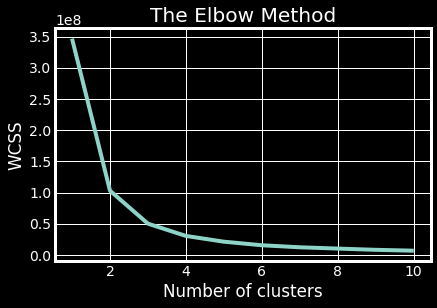

In [ ]:
X = df_cluster.iloc[:, [1, 2]].values

plt.style.use("dark_background")

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.style.use("dark_background")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(range(1, 11), wcss)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

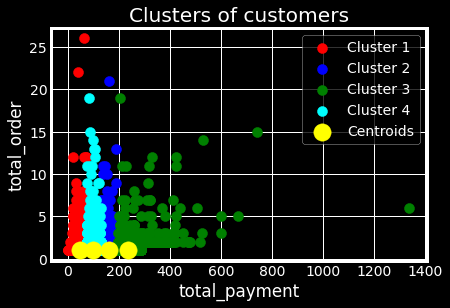

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('total_payment')
plt.ylabel('total_order')
plt.legend()
plt.show()

## Cluster Interpretation

In [ ]:
# The greens show that the customer is the highest spender in the platform and loyal
# The blues show that the customer is the second cluster of the most highest spender in the platform and loyal
# The light-blues show that the customer is the third cluster of the most highest spender in the platform and loyal
# The red show that the customer is the lowest spender in the platform

## Recommendation based on the cluster result

In [ ]:
# Segmented ads could be given
# 1. For the reds and light blues, ads should feature promo such as cheaper price or high discount.
# 2. For the greens and blues, ads featuring lifestyle that have high price could still be effective and giving much more revenue.